# Building ML models on a classification problem
<h3>Activities</h3>
<ol type="1">
    <li>Data collection, loading, and assembling </li>
    <li>Understanding the variables </li>
    <li>Data cleaning
        <ul>
            <li> Checking nan values  </li>
            <li> detecting outliers </li> 
             <li> checking duplicates </li> 
         </ul>
    </li>
    <li>Build ML models using percentage split and cross-validation
         <ul>
            <li> Random Forest  </li>
            <li> Naïve Bayes </li>
            <li> Artificial Neural Networks  </li>  
         </ul>
    </li>
    <li>Model comparison </li>
    <li>Communicating the insights </li>
</ol>

### Importing Libraries

In [1]:
#for data loading, assembly, manipulation, and exploration.
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model fitting
from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.naive_bayes import GaussianNB #probabilistic
from sklearn.neural_network import MLPClassifier

#for model evaluation metrics 
from sklearn.metrics import precision_score, recall_score, f1_score

#for preprocessing( data transformation)
from sklearn.preprocessing import LabelEncoder #preprocessing

#for model selection
from sklearn.model_selection import train_test_split  #training and testing
from sklearn.model_selection import KFold, cross_val_score     # cross-validation

#generating metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report #evaluation 
from sklearn.metrics import accuracy_score

# for statistical models used in feature selection
import statsmodels.api as sm

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

<!-- # Classification: Model Building and Evaluation 
Load diabetes dataset--Build models various ML algorithms and compare their performance.
Algorithms considered: Random Forest, naïve Bayes, and artificial neural networks. -->

### Load and examine diabetes dataset

In [2]:
# read the diabetes dataset as a dataframe
diabetes_df = pd.read_csv("diabetes_data_upload.csv")


In [3]:
diabetes_df            # examine data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


From here, the diabetes dataset has 520 rows and 17 columns 

### Data exploration

In [4]:
diabetes_df.describe(include="all")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
diabetes_df.head(25)   # get head of the data for 25 instances

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [6]:
diabetes_df.tail(25)   # get the tail of the data for 25 instances

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
495,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,Negative
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative
500,66,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
501,67,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative
502,70,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
503,44,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
504,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [7]:
diabetes_df.sample(25)           # get a sample of 25 instances 

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
305,40,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Negative
460,47,Male,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,Negative
88,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
195,31,Male,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive
125,55,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,Positive
249,55,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
278,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
430,32,Male,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,Positive
442,63,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes,Positive
182,35,Female,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,Positive


In [8]:
diabetes_df['Age'].unique()         # see different ages considered

array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62,
       39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25,
       47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26],
      dtype=int64)

In [9]:
diabetes_df.info()          # get brief information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

The diabetes dataset has 520 entries and 17 columns. The 16 columns are the features that can be used to measure the possibility of having diabetes and the last column is the class column that can be taken as the status of getting diabetes if its is positive or negative.  Only the age column is a number, other columns information are classified in categories (Yes, No).

In [10]:
diabetes_df['class'].value_counts()        # counting the number of instances per class

Positive    320
Negative    200
Name: class, dtype: int64

Many people has symptoms that results into Positive than negative

## Data cleaning

###  Checking nan values

In [11]:
# checking nan values
diabetes_df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

The data has 16 features and  there is no nan values in our dataset

In [12]:
# analyze the data numerically
diabetes_df.describe()      

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [13]:
# checking for duplicates
diabetes_df[diabetes_df.duplicated()]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


The dataset had duplicates but they were ignored

### Encoding the features ( categorical data to numerical) 

In [14]:
# Encode Categorical Columns
labenc = LabelEncoder()
diabetes_data= diabetes_df.apply(labenc.fit_transform)
diabetes_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,15,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,24,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [15]:
# analyse the transformed dataset numerically 
diabetes_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,23.905769,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,11.754586,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
x.shape

(520, 16)

In [19]:
y.shape

(520,)

### Feature selection

Feature selection is done to avoid overfitting by removing unnecessary features for prediction. 

it is done by using stepwise regression -- Forward selection

The forward selection will start with an empty set of variables, then add one variable at time at a time until a certain criterion is met basing on the most significant using the statistical significance.  In this case it will select features based on the feature that has the best pvalue less than 0.05 threshold. The selected features will further be used for fitting random forest model, naive bayes model amd artificial neural networks model. 


In [20]:
#forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
# defining dependent and independent variables 
x = diabetes_data.iloc[:,:-1]    # all the variables minus the last(class) as dependent variables
y = diabetes_data['class']       # the last variable as independent variable

selected_features=[]

# forward selection
def forward_regression(X, y, verbose=False):
                       
    top_variable = []               # keeps the most significant variables
    
    while True:
        changed=False
        least_significant = list(set(X.columns)-set(top_variable))      # the least significant variables
        new_pvalue = pd.Series(index=least_significant)
        for values in least_significant:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[top_variable+[values]]))).fit() 
            new_pvalue[values] = model.pvalues[values]
        best_pvalue = new_pvalue.min()
        if best_pvalue < 0.05:                 # the best pvalue is the pvalue with less than 0.05 threshold
            best_variable = new_pvalue.idxmin()
            top_variable.append(best_variable)
            changed=True
            if True:
                print('Add {:20} with p-value {:.6}'.format(best_variable, best_pvalue))
                selected_features.append(best_variable) #storing the added feature

        if not changed:
            break
    print(model.summary())

forward_regression(x,y,verbose=True)
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32

In [17]:
# selected features
print(selected_features)

['Polyuria', 'Polydipsia', 'Gender', 'Irritability', 'Itching', 'Genital thrush', 'partial paresis', 'delayed healing']


## Building ML Models

### Using percentage split

In [18]:
# defining dependent variables and independent variable after feature selection
x = diabetes_data[selected_features]
y = diabetes_data['class'] 


In [19]:
# split the data for training and testing using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42) # 70% training set and 30% test set

In [20]:
# getting the shape of the splitted data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((364, 8), (156, 8), (364,), (156,))

In [21]:
x_train.describe()

,Polyuria,Polydipsia,Gender,Irritability,Itching,Genital thrush,partial paresis,delayed healing
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,0.486264,0.431319,0.637363,0.230769,0.508242,0.206044,0.414835,0.464286
std,0.500499,0.495942,0.481423,0.421905,0.500620,0.405019,0.493372,0.499409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
x_test.describe()

,Polyuria,Polydipsia,Gender,Irritability,Itching,Genital thrush,partial paresis,delayed healing
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.519231,0.487179,0.615385,0.269231,0.435897,0.262821,0.467949,0.448718
std,0.501239,0.501445,0.488071,0.444989,0.497471,0.441583,0.500579,0.498965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
x_train.var()

Polyuria           0.250500
Polydipsia         0.245959
Gender             0.231768
Irritability       0.178004
Itching            0.250621
Genital thrush     0.164041
partial paresis    0.243416
delayed healing    0.249410
dtype: float64

In [24]:
x_test.var()              

Polyuria           0.251241
Polydipsia         0.251447
Gender             0.238213
Irritability       0.198015
Itching            0.247477
Genital thrush     0.194996
partial paresis    0.250579
delayed healing    0.248966
dtype: float64

The variances of the x_train and x_test sets after feature selection are in the same range so there is no need of using standard scaler

### Random forest 

In [25]:
# defining dependent variables and independent variable after feature selection
x = diabetes_data[selected_features]
y = diabetes_data['class'] 

# build random forest classifier
randomf = RandomForestClassifier(n_estimators=100,random_state=42)

# train the model 
randomf.fit(x_train,y_train)       

# perform prediction on x_test
y_predicted=randomf.predict(x_test)
y_predicted

# check performance using accuracy
print("Random forest accuracy:",accuracy_score(y_test,y_predicted))

Random forest accuracy: 0.9551282051282052


<p> From the classification model performance using classification report, the accuracy of the model is 0.95. This means that 95% of the predicted instances are correct. </p>

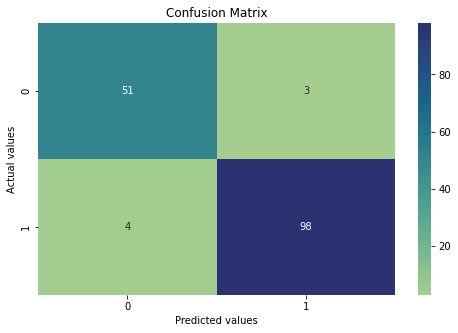

In [26]:
# build confusion matrix
cmatrix=confusion_matrix(y_test,y_predicted)
cmatrix

# graph confusion matrix using sea born
plt.figure(figsize=(8,5))
sns.heatmap(cmatrix, cmap='crest', annot=True, fmt = 'g')

#Labelling
plt.xlabel('Predicted values')   
plt.ylabel('Actual values')                 
plt.title('Confusion Matrix')
plt.show()

<p>
    <b> From the Confusion matrix above, the true positive is 98, true negative is 51, false positive is 3 and False negative    is 4. This means that : </b>
    <ul>
        <li> Out of out 101 actual positives, 98 are correctly predicted positives and out of 55 actual negatives, 3 is falsely predicted as positive. </li> 
        <li> Out of 55 actual negatives, 51 are  correctly predicted negatives and out of 101 actual positives, 4 is falsely predicted as negative. </li>
    </ul>
</p>

### Naïve Bayes

In [27]:
# build Naïve Bayes model
naiveb = GaussianNB()

# train the model
naiveb.fit(x_train,y_train)

# perform prediction on x_test
y_pred=naiveb.predict(x_test)
y_pred

# check performance using accuracy
print("Naive bayes accuracy",accuracy_score(y_test,y_pred))


Naive bayes accuracy 0.9038461538461539


<p> From the classification model performance using classification report, the accuracy of the model is 0.90. This means that 90% of the predicted instances are correct. </p>

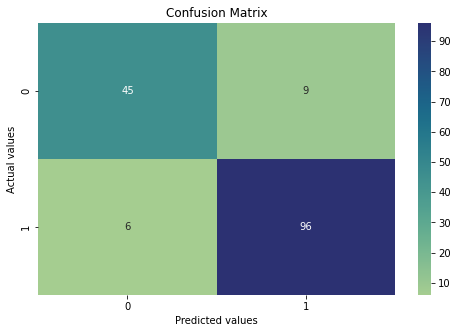

In [28]:
# build confusion matrix
cmatrix=confusion_matrix(y_test,y_pred)
cmatrix

# graph confusion matrix using sea born
plt.figure(figsize=(8,5))
sns.heatmap(cmatrix, cmap='crest', annot=True, fmt = 'g')

#Labelling
plt.xlabel('Predicted values')   
plt.ylabel('Actual values')                 
plt.title('Confusion Matrix')
plt.show()

<p>
    <b> From the Confusion matrix above, the true positive is 96, true negative is 45, false positive is 9 and False negative is 6. This means that : </b>
    <ul>
        <li> Out of out 105 actual positives, 96 are correctly predicted positives and out of 51 actual negatives, 9 is falsely predicted as positive. </li> 
        <li> Out of 51 actual negatives, 45 are correctly predicted negatives and out of 105 actual positives, 6 are falsely predicted as negative. </li>
    </ul>
</p>

### Artificial neural network

In [29]:
# build ANN model 
ann_model= MLPClassifier(hidden_layer_sizes=(10,4), max_iter=300,random_state=1 ,solver='lbfgs', activation='relu', batch_size=32 )

# fit the model
ann_model.fit(x_train, y_train)


# performing prediction on x_test
y_predict=ann_model.predict(x_test)
y_predict


# check performance using accuracy
print("ANN accuracy",accuracy_score(y_test,y_predict))


ANN accuracy 0.9551282051282052


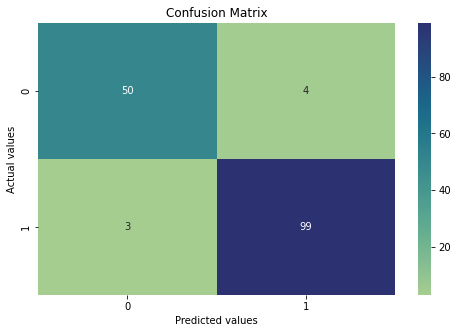

In [30]:
# build confusion matrix
cmatrix=confusion_matrix(y_test,y_predict)
cmatrix

# graph confusion matrix using sea born
plt.figure(figsize=(8,5))
sns.heatmap(cmatrix, cmap='crest', annot=True, fmt = 'g')

# labelling
plt.xlabel('Predicted values')   
plt.ylabel('Actual values')                 
plt.title('Confusion Matrix')
plt.show()

<p>
    <b> From the Confusion matrix above, the true positive is 99, true negative is 50, false positive is 4 and False negative is 3. This means that : </b>
    <ul>
        <li> Out of out 103 actual positives, 99 are correctly predicted positives and out of 53 actual negatives, 4 is falsely predicted as positive. </li> 
        <li> Out of 53 actual negatives, 50 are correctly predicted negatives and out of 103 actual positives, 3 are falsely predicted as negative. </li>
    </ul>
</p>

### Visualizing Model comparison based on performance metrics(Precision, Recall, f1-score)

In [31]:
# random forest performancemetrics(Precision, recall and f1_score)
rf_precision = precision_score(y_test,y_predicted, average='weighted')
rf_recall = recall_score(y_test,y_predicted, average='weighted')
rf_f1score = f1_score(y_test,y_predicted, average='weighted')

print("Precision:",rf_precision, "Recall:",rf_recall,"f1-score:",rf_f1score)

Precision: 0.9554040019386554 Recall: 0.9551282051282052 f1-score: 0.9552235173873894


In [32]:
# naive bayes performance metrics(Precision, recall and f1_score)
nb_precision = precision_score(y_test,y_pred, average='weighted')
nb_recall = recall_score(y_test,y_pred, average='weighted')
nb_f1score = f1_score(y_test,y_pred, average='weighted')

print("Precision:",nb_precision , "Recall:",nb_recall,"f1-score:",nb_f1score)

Precision: 0.9032320620555914 Recall: 0.9038461538461539 f1-score: 0.9031692944736422


In [33]:
# artificial neural network  performance metrics(precisiopn, recall, f1_score)
ann_precision = precision_score(y_test,y_predict, average='weighted')
ann_recall = recall_score(y_test,y_predict, average='weighted')
ann_f1score = f1_score(y_test,y_predict, average='weighted')

print("Precision:",ann_precision, "Recall:",ann_recall,"f1-score:",ann_f1score)

Precision: 0.9550143024222526 Recall: 0.9551282051282052 f1-score: 0.9550279672458839


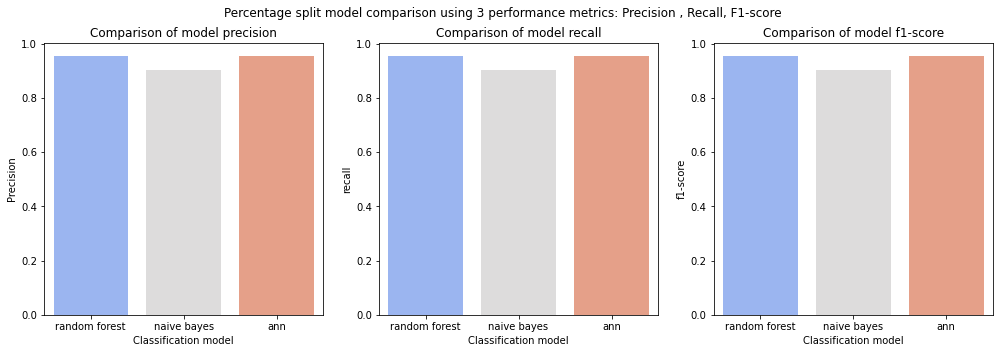

In [34]:
### Visualizing the model performance 
# extracting precision, recall, and f1-score for both 3 models
precisions={"random forest":rf_precision, "naive bayes":nb_precision, "ann":ann_precision}
recalls={"random forest":rf_recall, "naive bayes":nb_recall, "ann":ann_recall}
f1_scores={"random forest":rf_f1score, "naive bayes":nb_f1score, "ann":ann_f1score}
f1_scores

# Ploting the graph of precision, recall and f1-score

# the x_axis
models = list(precisions.keys())
models2 = list(recalls.keys())
models3 = list(f1_scores.keys())

# the y-axis
model_precisions = list(precisions.values())
model_recalls = list(recalls.values())
model_f1_scores = list(f1_scores.values())

fig, axes = plt.subplots(1, 3, figsize=(17,5))  # seting figure size
fig.suptitle('Percentage split model comparison using 3 performance metrics: Precision , Recall, F1-score')

# precision bar graph
precision = sns.barplot(ax=axes[0],  x=models, y=model_precisions, palette = 'coolwarm')
# add label to the axis and label to the plot
precision.set(xlabel ="Classification model", ylabel = "Precision", title ='Comparison of model precision')

# recall bar graph
recall = sns.barplot(ax=axes[1], x=models2, y=model_recalls,  palette = 'coolwarm')
# add label to the axis and label to the plot
recall.set(xlabel ="Classification model", ylabel = "recall", title ='Comparison of model recall')

# f1-score graph
f1score = sns.barplot(ax=axes[2], x=models3, y=model_f1_scores, palette = 'coolwarm')
# add label to the axis and label to the plot
f1score.set(xlabel ="Classification model", ylabel = "f1-score", title ='Comparison of model f1-score')


plt.show()


Comparing the performance of precision, recall and f1-score performance metrics on different algorithms(random forest, naive bayes and artificial neural networks) using percentage split, the naive bayes model did not perform well on all the 3 metrics. Random forest and artificial neural networks algorithms almost performed the same on 2 metrics(precision and f1_score) but random forest had the highest score. Plus, the recall score was the same for both random forest and artificial neural networks. Hence overall, Random forest was the best among the other algorithms. 

### Using cross-validation

In [35]:
# dependent variables and independent variable after feature selection
x = diabetes_data[selected_features]
y = diabetes_data['class'] 

### Random forest

In [36]:
# build random forest classifier using cross validation
randf = RandomForestClassifier(n_estimators=100,random_state=42)

# using K-fold for cross-validation 
k_folds = KFold(n_splits=10)

# using k-fold CV to evaluate model
score = cross_val_score(randf, x, y, scoring='accuracy',cv = k_folds)
print("The average accuracy for random forest classifier",score.mean())


The average accuracy for random forest classifier 0.9461538461538461


### Naïve Bayes 

In [37]:
# build Naïve Bayes model
naiveb = GaussianNB()

# using K-fold for cross-validation 
k_folds = KFold(n_splits=10)

# using k-fold CV to evaluate model
score = cross_val_score(naiveb, x, y, scoring='accuracy',cv = k_folds)
print("The average accuracy for Naïve Bayes ",score.mean())

The average accuracy for Naïve Bayes  0.8673076923076923


### Artificial neural network

In [38]:
# build ANN model 
ann_model= MLPClassifier(hidden_layer_sizes=(10,4),max_iter=300, solver='lbfgs', activation='relu', batch_size=32, random_state=1)

# using K-fold for cross-validation 
k_folds = KFold(n_splits=10)

# using k-fold CV to evaluate model
score = cross_val_score(ann_model, x, y, scoring='accuracy',cv = k_folds)
print("The average accuracy for MLPclassifier:",score.mean())


The average accuracy for MLPclassifier: 0.9499999999999998


### Evaluating performance of the models for different metrics(precision,recall and f1-score) using cross validation



In [39]:
# random forest
precision_score = cross_val_score(randf, x, y, cv=10, scoring='precision_weighted')
avg_precision_score =precision_score.mean()

recall_score = cross_val_score(randf, x, y, cv=10, scoring='recall_weighted')
avg_recall_score = recall_score.mean()

f1_score = cross_val_score(randf, x, y, cv=10, scoring='f1_weighted')
average_f1score = f1_score.mean()
print(" Precision:",avg_precision_score , "Recall:",avg_recall_score, "f1-score:",average_f1score)
 

 Precision: 0.9542868748131905 Recall: 0.9519230769230769 f1-score: 0.9516034490279613


In [40]:
# naive bayes
precision_score2 = cross_val_score(naiveb, x, y, cv=10, scoring='precision_weighted')
avg_precision_score2 =precision_score2.mean()

recall_score2 = cross_val_score(naiveb, x, y, cv=10, scoring='recall_weighted')
avg_recall_score2 = recall_score2.mean()

f1_score2 = cross_val_score(naiveb, x, y, cv=10, scoring='f1_weighted')
average_f1score2 = f1_score2.mean()

print(" Precision:",avg_precision_score2 , "Recall:",avg_recall_score2, "f1-score:",average_f1score2)

 Precision: 0.8755708436798002 Recall: 0.8692307692307691 f1-score: 0.8654515901138919


In [41]:
# artificial neural networks
precision_score3 = cross_val_score(ann_model, x, y, cv=10, scoring='precision_weighted')
avg_precision_score3 =precision_score3.mean()

recall_score3 = cross_val_score(ann_model, x, y, cv=10, scoring='recall_weighted')
avg_recall_score3 = recall_score3.mean()

f1_score3 = cross_val_score(ann_model, x, y, cv=10, scoring='f1_weighted')
average_f1score3 = f1_score3.mean()

print(" Precision:",avg_precision_score3 , "Recall:",avg_recall_score3, "f1-score:",average_f1score3)

 Precision: 0.9505204186937932 Recall: 0.948076923076923 f1-score: 0.9480028442373017


### Visualizing the performance metrics 

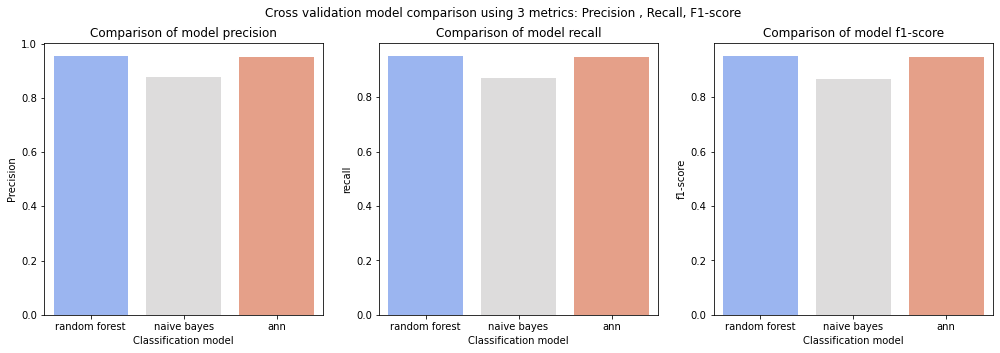

In [42]:
# extracting precision, recall, and f1-score for both 3 models
precision_scores={"random forest":avg_precision_score, "naive bayes":avg_precision_score2, "ann":avg_precision_score3}
recall_scores={"random forest":avg_recall_score, "naive bayes":avg_recall_score2, "ann":avg_recall_score3}
f1_scores={"random forest":average_f1score, "naive bayes":average_f1score2, "ann":average_f1score3}


# ploting the graph of precision, recall and f1-score

# the x_axis
models = list(precision_scores.keys())
models2 = list(recall_scores.keys())
models3 = list(f1_scores.keys())

# the y_axis
model_precisions = list(precision_scores.values())
model_recalls = list(recall_scores.values())
model_f1_scores = list(f1_scores.values())


fig, axes = plt.subplots(1, 3, figsize=(17,5))
fig.suptitle('Cross validation model comparison using 3 metrics: Precision , Recall, F1-score')

# precision bar graph
precision = sns.barplot(ax=axes[0],  x=models, y=model_precisions, palette = 'coolwarm')
# add label to the axis and label to the plot
precision.set(xlabel ="Classification model", ylabel = "Precision", title ='Comparison of model precision')

# recall bar graph
recall = sns.barplot(ax=axes[1], x=models2, y=model_recalls,  palette = 'coolwarm')
# add label to the axis and label to the plot
recall.set(xlabel ="Classification model", ylabel = "recall", title ='Comparison of model recall')

# f1-score graph
f1score = sns.barplot(ax=axes[2], x=models3, y=model_f1_scores, palette = 'coolwarm')
# add label to the axis and label to the plot
f1score.set(xlabel ="Classification model", ylabel = "f1-score", title ='Comparison of model f1-score')


plt.show()


Comparing the performance of precision, recall and f1-score performance metrics on different algorithms(random forest, naive bayes and artificial neural networks) using cross-validation, the naive bayes model did not perform well on all the 3 metrics. Random forest and artificial neural networks algorithms almost performed the same on precision score but random forest had the highest score. On the other scores random forest performed better too comparing it with other algorithms. Thus using cross-validation, random forest appeared to be the best.

In [43]:
# installing prettytable to create tables
# pip install prettytable


In [44]:
# puting in a table performance comparison of the algorithms under percentage split and cross-validation on three performance metrics
#for easy visualization

from prettytable import PrettyTable

# performance metrics using percentage split
# table columns 
print("Comparison of the algorithms under percentage split\n")
performance_metrics = PrettyTable(["Algorithms", "Precision", "Recall", "F1-score"])
  
# adding rows
performance_metrics.add_row(["Random forest", rf_precision, rf_recall, rf_f1score])
performance_metrics.add_row(["Naïve Bayes", nb_precision, nb_recall, nb_f1score])
performance_metrics.add_row(["Artificial Neural Networks", ann_precision, ann_recall, ann_f1score])

print(performance_metrics )

# performance metrics using cross-validation
# table columns 
print("Comparison of the algorithms under cross-validation\n")
performance_metrics_cv = PrettyTable(["Algorithms", "Precision", "Recall", "F1-score"])
  
# adding rows
performance_metrics_cv.add_row(["Random forest", avg_precision_score, avg_recall_score, average_f1score])
performance_metrics_cv.add_row(["Naïve Bayes", avg_precision_score2, avg_recall_score2, average_f1score2])
performance_metrics_cv.add_row(["Artificial Neural Networks", avg_precision_score3, avg_recall_score3, average_f1score3])

print(performance_metrics_cv)



Comparison of the algorithms under percentage split

+----------------------------+--------------------+--------------------+--------------------+
|         Algorithms         |     Precision      |       Recall       |      F1-score      |
+----------------------------+--------------------+--------------------+--------------------+
|       Random forest        | 0.9554040019386554 | 0.9551282051282052 | 0.9552235173873894 |
|        Naïve Bayes         | 0.9032320620555914 | 0.9038461538461539 | 0.9031692944736422 |
| Artificial Neural Networks | 0.9550143024222526 | 0.9551282051282052 | 0.9550279672458839 |
+----------------------------+--------------------+--------------------+--------------------+
Comparison of the algorithms under cross-validation

+----------------------------+--------------------+--------------------+--------------------+
|         Algorithms         |     Precision      |       Recall       |      F1-score      |
+----------------------------+------------------

Overall, comparing the performance of the three algorithms using percentage split and using cross-validation on Precision score, Recall score and f1_score, Random forest model appeared to be the best using both percentage split and cross validation because it has higher performance metrics score than other algorithms and naive bayes became the least best using both percentage split and cross validation.

Based on the cross-validation results, Random forest algorithm is recommended to be used on the diabetes dataset because it has the highest precision score, recall_score and f1_score compared to other algorithms. 